In [3]:
import pandas as pd
import numpy as np

locations = pd.read_csv(r'/Users/jakefischer/DivvyScrape/tract_and_location.csv')
tracpop = pd.read_csv(r'/Users/jakefischer/DivvyScrape/tract_populations.csv')
traffic = pd.read_csv(r'/Users/jakefischer/DivvyScrape/traffic_div_data4.csv')



tracpop

,Unnamed: 0,tracts,population
0,0,660500,5005
1,1,230500,3559
2,2,251700,1301
3,3,390200,1674
4,4,431301,3194
...,...,...,...
795,795,350100,2077
796,796,730100,2514
797,797,690300,2428
798,798,51400,1852


In [5]:
lats = []
longs = []
for i in list(tracpop.index):
    if(i in list(locations.index)):
        lats.append(locations.loc[i, "latitude"])
        longs.append(locations.loc[i, "longitude"])
    else:
        lats.append(float("nan"))
        longs.append(float("nan"))
    
tracpop["latitudes"] = lats
tracpop["longitudes"] = longs


In [7]:
for k in range(len(tracpop.index)):
    if(np.isnan(tracpop.loc[(tracpop.index)[k],"latitudes"])):
        tracpop = tracpop.drop(tracpop.index[k], axis = 0)


In [8]:
alltracts = []
for i in list(traffic.index):
    #for latititude
    x = np.full(shape = len(tracpop.index), fill_value = traffic.loc[i,"lattitude"])
    #latdif = np.abs((np.subtract(x,tracpop["latitudes"]))) 
    latdif = x-tracpop['latitudes']    
    #for longitude
    y = np.full(shape = len(tracpop.index), fill_value = traffic.loc[i,"longitude"])
    #longdif = np.abs(np.subtract(y, tracpop["longitudes"]))
    longdif = y-tracpop['longitudes']
    
    #distances from station to every tract
    d = np.sqrt((np.square(latdif)+np.square(longdif)))
    
    theone = np.argmin(d)
    
    alltracts.append(theone)

traffic['tracts']= tracpop.index[alltracts]


popys = []
for g in list(traffic['tracts']):
    popys.append(tracpop.loc[g,'population'])

traffic["population"] = popys

In [167]:
traffic

,Unnamed: 0,Unnamed: 0.1,lattitude,longitude,Mon Sep 13 09:46:44 2021,Mon Sep 13 09:47:47 2021,Mon Sep 13 09:48:50 2021,Mon Sep 13 09:49:52 2021,Mon Sep 13 09:50:55 2021,Mon Sep 13 09:51:58 2021,...,Mon Sep 13 11:45:46 2021,Mon Sep 13 11:46:49 2021,Mon Sep 13 11:47:52 2021,Mon Sep 13 11:48:55 2021,Mon Sep 13 11:49:58 2021,Mon Sep 13 11:51:01 2021,Mon Sep 13 11:52:04 2021,absolute traffic,tracts,population
0,350,Paulina St & Flournoy St,41.872950,-87.669130,19,19,21,20,23,23,...,25,25,24,24,24,24,24,0.310924,838100,1853
1,672,W 103rd St & S Avers Ave,41.705846,-87.717074,5,6,6,6,6,6,...,7,7,7,7,7,7,6,0.277311,740200,6679
2,31,Streeter Dr & Grand Ave,41.892278,-87.612043,5,5,5,5,5,7,...,13,13,14,13,13,13,13,0.252101,81402,4742
3,192,St. Clair St & Erie St,41.894345,-87.622798,12,12,12,13,14,14,...,18,18,18,18,17,18,18,0.252101,81401,2251
4,694,N Green St & W Lake St,41.885579,-87.648484,1,1,1,1,1,0,...,1,1,1,0,0,0,0,0.243697,280100,6725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,182,Indiana Ave & 40th St,41.821680,-87.621600,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0.000000,835900,3109
741,122,Racine Ave & 13th St,41.865054,-87.656959,4,4,4,4,4,4,...,4,4,4,4,4,4,4,0.000000,283800,3656
742,385,DuSable Museum,41.791568,-87.607852,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.000000,836200,1660
743,185,Prairie Ave & Garfield Blvd,41.794853,-87.618691,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0.000000,400400,1946


In [168]:
import matplotlib.pyplot as plt

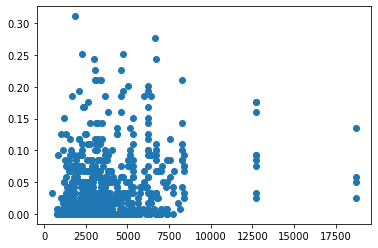

In [175]:
x = traffic["population"]
# corresponding y axis values
y = traffic['absolute traffic']
 
# plotting the points
plt.plot(x, y,linestyle='none', marker = 'o')

In [9]:
tracpop

,Unnamed: 0,tracts,population,latitudes,longitudes
tracts,,,,,
660500,0,660500,5005,41.775343,-87.707405
230500,1,230500,3559,41.911462,-87.733954
251700,2,251700,1301,41.892134,-87.745501
390200,3,390200,1674,41.813377,-87.599257
431301,4,431301,3194,41.753307,-87.558773
...,...,...,...,...,...
350100,795,350100,2077,41.841513,-87.612151
730100,796,730100,2514,41.724690,-87.638308
690300,797,690300,2428,41.768709,-87.628650
